In [19]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sixteenS = pd.read_csv('../data/input/NCOG_21_16S_redo2_asv_count_tax.tsv', sep='\t')
eighteenS = pd.read_csv('../data/input/NCOG_18sV4_asv_count_tax.tsv', sep='\t')
sixteenS.index = pd.Series(sixteenS.index).apply(lambda x: 'potu_' + str(x))
eighteenS.index = pd.Series(eighteenS.index).apply(lambda x: 'eotu_' + str(x))

In [3]:
gph = nx.read_gml('../data/graph/NCOG_network_output_v4.gml')

In [4]:
taxonDict = {}
for node, taxon in sixteenS['silva_Taxon'].items():
    taxonDict[node] = {'Taxon': taxon}
for node, taxon in eighteenS['pr2_Taxon'].items():
    taxonDict[node] = {'Taxon': taxon}
nx.set_node_attributes(gph, taxonDict)

In [5]:
nodes = pd.Series(list(gph.nodes()))
len(nodes[(nodes.str.contains('potu')) | (nodes.str.contains('eotu'))])

3845

In [6]:
len(gph.nodes)

3873

In [7]:
nodetaxons = nx.get_node_attributes(gph, 'Taxon')
edgelist = nx.to_pandas_edgelist(gph, source='node1', target='node2')
edgelist['node1Taxonomy'] = edgelist['node1'].apply(lambda x: nodetaxons[x] if x in nodetaxons else np.nan)
edgelist['node2Taxonomy'] = edgelist['node2'].apply(lambda x: nodetaxons[x] if x in nodetaxons else np.nan)
edgelist = edgelist[['node1', 'node2', 'node1Taxonomy', 'node2Taxonomy', 'weight']]
edgelist.to_csv('NCOG_network_edgelist.csv', index=False)

<Axes: >

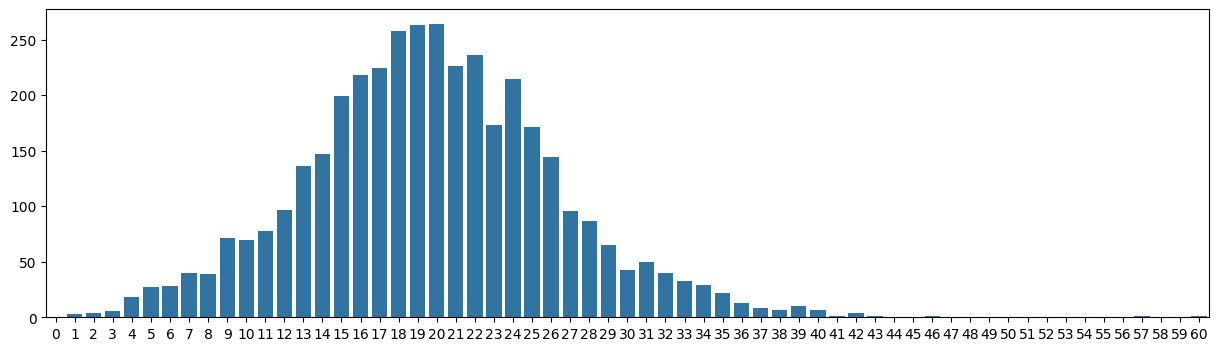

In [8]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
y = nx.degree_histogram(gph)
sns.barplot(x=list(range(len(y))), y=y, ax=ax)

In [9]:
nx.density(gph)

0.005097939112269089

In [10]:
nx.number_of_nodes(gph)

3873

In [11]:
nx.number_of_edges(gph)

38225

In [12]:
nx.is_weighted(gph)

True

### Top 30 nodes by degree

In [13]:
attrs = nx.get_node_attributes(gph, 'Taxon')
for node, degree in sorted(gph.degree, key=lambda x: x[1], reverse=True)[:30]:
    if degree >= 40:
        print(node, '|', degree, 'Edges', end=" | ")
        if node in attrs:
            print(attrs[node])
        else:
            print()

eotu_1255 | 60 Edges | Eukaryota;Alveolata;Dinoflagellata;Dinophyceae;Gymnodiniales;Gymnodiniaceae;Gymnodinium
eotu_14223 | 57 Edges | Eukaryota;Stramenopiles;Ochrophyta;Dictyochophyceae;Dictyochophyceae_X;Dictyochales;Dictyochales_X;Dictyochales_X_sp.;
eotu_23472 | 46 Edges | Eukaryota;Alveolata;Dinoflagellata;Syndiniales;Dino-Group-II;Dino-Group-II-Clade-7;Dino-Group-II-Clade-7_X;Dino-Group-II-Clade-7_X_sp.;
season_Winter | 43 Edges | 
eotu_18914 | 42 Edges | Eukaryota;Alveolata;Dinoflagellata;Dinophyceae
potu_9749 | 42 Edges | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Puniceispirillales; f__SAR116_clade; g__SAR116_clade
potu_16677 | 42 Edges | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Flavobacteriaceae; g__NS2b_marine_group; s__uncultured_marine
season_Autumn | 42 Edges | 
potu_2832 | 41 Edges | d__Bacteria; p__SAR324_clade(Marine_group_B); c__SAR324_clade(Marine_group_B); o__SAR324_clade(Marine_group_B); f__SAR324_clade(Marine_group_B); 

In [14]:
for line in nx.generate_edgelist(gph):
    print(line)
    break

eotu_27 eotu_983 {'weight': 0.10149174561805158}


In [15]:
edgeweights = nx.get_edge_attributes(gph, 'weight')
for edge in list(edgeweights.keys())[:20]:
    print(edge, '\tWeight:', edgeweights[edge])

('eotu_27', 'eotu_983') 	Weight: 0.10149174561805158
('eotu_27', 'eotu_1021') 	Weight: 0.1001546106338834
('eotu_27', 'eotu_6238') 	Weight: 0.28546554514600675
('eotu_27', 'eotu_10470') 	Weight: 0.11274584882506387
('eotu_27', 'eotu_16560') 	Weight: 0.12600029683422856
('eotu_27', 'eotu_17888') 	Weight: 0.10921523418537671
('eotu_27', 'eotu_19203') 	Weight: 0.1853354225891696
('eotu_27', 'eotu_19769') 	Weight: 0.14577157138775226
('eotu_27', 'eotu_21382') 	Weight: 0.10491287153555566
('eotu_27', 'eotu_21662') 	Weight: 0.09713232823183271
('eotu_27', 'eotu_25140') 	Weight: 0.1553815344455318
('eotu_27', 'eotu_29450') 	Weight: 0.12657467362905087
('eotu_27', 'eotu_33377') 	Weight: 0.09884606865857425
('eotu_27', 'eotu_36037') 	Weight: 0.1417208376668878
('eotu_27', 'eotu_36945') 	Weight: 0.11031639614526399
('eotu_27', 'eotu_36954') 	Weight: 0.14679169552403004
('eotu_27', 'eotu_38039') 	Weight: 0.14048276229516737
('eotu_27', 'eotu_40273') 	Weight: 0.0872010243772692
('eotu_27', 'eotu_4

In [16]:
pos_edges = 0
neg_edges = 0
for edge, weight in nx.get_edge_attributes(gph, 'weight').items():
    if weight >= 0:
        pos_edges += 1
    else:
        neg_edges += 1
total = 0

## Table matching Chaffron paper

#### convert networkx graph to an igraph graph for computation of descriptive statistics

In [34]:
# Convert networkx graph to igraph
G_ig = ig.Graph.from_networkx(gph)

# Calculate the graph's clustering coefficient
clustering_coefficient = G_ig.transitivity_undirected()

# Calculate the average shortest path length
average_shortest_path_length = G_ig.average_path_length(directed=False)

# Calculate the diameter
diameter = G_ig.diameter(directed=False)

# Calculate the average betweenness
betweenness = G_ig.betweenness(directed=False)
average_betweenness = np.mean(betweenness)

# Extract positive network (only positive weights)
positive_edges = [(e.source, e.target) for e in G_ig.es if e['weight'] > 0]
positive_weights = [e['weight'] for e in G_ig.es if e['weight'] > 0]
G_ig_positive = ig.Graph(edges=positive_edges)
G_ig_positive.es['weight'] = positive_weights

# Calculate the modularity of the positive network
positive_clusters = G_ig_positive.community_fastgreedy(weights='weight').as_clustering()
modularity_positive = positive_clusters.modularity

# Number of modules in the positive network
number_of_modules_positive = len(positive_clusters)

In [64]:
table1 = {
    'Nodes': [nx.number_of_nodes(gph)],
    'Edges': [nx.number_of_edges(gph)],
    'Positive Edges (%)': [str(pos_edges) + ' (' + str(np.round(100 * pos_edges/(pos_edges + neg_edges), 2)) + '%)'],
    'Negative Edges': [neg_edges],
    'Average clustering coefficient (transitivity)': [clustering_coefficient],
    'Average path length': [average_shortest_path_length],
    'Diameter': [diameter],
    'Average betweenness': [average_betweenness],
    'Modularity of positive network': [modularity_positive], # these two are more difficult in networkx than igraph
    'Number of modules in positive network': [number_of_modules_positive] 
}

In [21]:
# Old implementation using networkx only
# table1 = {
#     'Nodes': [nx.number_of_nodes(gph)],
#     'Edges': [nx.number_of_edges(gph)],
#     'Positive Edges (%)': [str(pos_edges) + ' ' + str(pos_edges/(pos_edges + neg_edges))],
#     'Negative Edges': [neg_edges],
#     'Average clustering coefficient': [nx.average_clustering(gph)],
#     'Average path length': [nx.average_shortest_path_length(gph)],
#     'Diameter': [nx.diameter(gph)],
#     'Average betweenness': [nx.betweenness_centrality(gph)],
#     'Modularity of positive network': [np.nan], # these two are more difficult in networkx than igraph
#     'Number of modules in positive network': [np.nan] 
# }

In [65]:
pd.DataFrame(table1)

,Nodes,Edges,Positive Edges (%),Negative Edges,Average clustering coefficient (transitivity),Average path length,Diameter,Average betweenness,Modularity of positive network,Number of modules in positive network
0,3873,38225,36031 (94.26%),2194,0.059416,3.357903,7,4564.899561,0.50544,8


### examine cluster modules in positive network

These clusters were generated using igraph's [community_fastgreedy](https://igraph.org/python/doc/api/igraph.Graph.html#community_fastgreedy) algorithm, which optimizes for modularity score (a score that goes up as intra-cluster distance is minimized and inter-cluster distance is maximized)

Note that the subgraphs will capture all of the nodes in the parent network, but not necessarily all of the edges (if two nodes that share an edge are split into different clusters, that edge is not represented by the cluster modules.

In [80]:
cluster_statistics = pd.DataFrame({
    'Cluster': np.arange(8),
    'Number of nodes': [subgph.vcount() for subgph in positive_clusters.subgraphs()],
    'Number of edges': [subgph.ecount() for subgph in positive_clusters.subgraphs()],
    'Proportion of overall nodes (%)': np.round([100 * subgph.vcount() / G_ig.vcount() for subgph in positive_clusters.subgraphs()], 2),
    'Proportion of overall edges (%)': np.round([100 * subgph.ecount() / G_ig.ecount() for subgph in positive_clusters.subgraphs()], 2),
    'Average clustering coefficient (transitivity)': [subgph.transitivity_undirected() for subgph in positive_clusters.subgraphs()],
    'Average betweenness': [np.mean(subgph.betweenness(directed=False)) for subgph in positive_clusters.subgraphs()]
}).set_index('Cluster', drop=True)
cluster_statistics

,Number of nodes,Number of edges,Proportion of overall nodes (%),Proportion of overall edges (%),Average clustering coefficient (transitivity),Average betweenness
Cluster,,,,,,
0,1087,9303,28.07,24.34,0.075529,1045.942962
1,458,2140,11.83,5.60,0.092879,501.519651
2,1089,6976,28.12,18.25,0.077557,1341.379247
3,262,848,6.76,2.22,0.280683,388.938931
4,960,6999,24.79,18.31,0.097894,1016.741667
5,13,39,0.34,0.10,0.547945,3.153846
6,2,1,0.05,0.00,NaN,0.000000
7,2,1,0.05,0.00,NaN,0.000000
